# Simple Regression


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('Data.csv')
# Drop the missing values
df = df.dropna()
df.head(20)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [12]:
# independent & dependent features
X = df[['x']]
y = df['y']

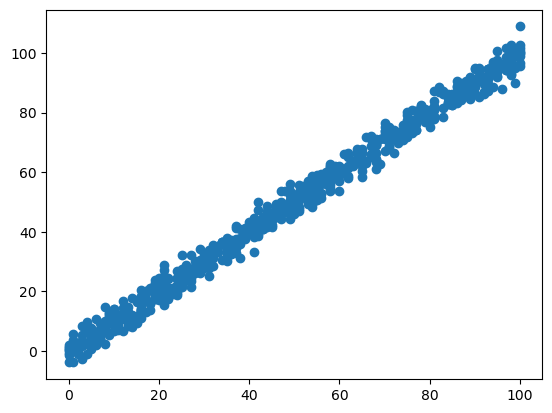

In [13]:
plt.scatter(X,y)

In [14]:
# Implement train test spli
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
np.array(X_train).shape

(489, 1)

In [2]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [3]:
reg.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [21]:
print('Coefficient :', reg.coef_)
print('Intercept :', reg.intercept_)

Coefficient : [28.85748792]
Intercept : 49.72468405706953


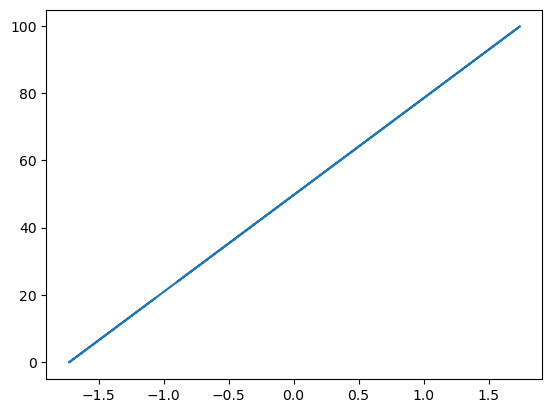

In [22]:
plt.plot(X_train,reg.predict(X_train))

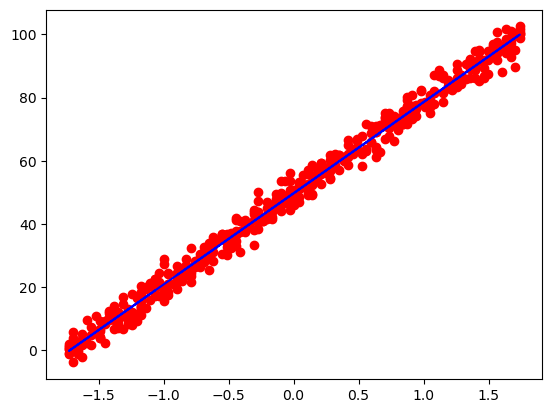

In [23]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,reg.predict(X_train),color='blue')
plt.show()

In [24]:
y_pred = reg.predict(X_test)
y_pred

array([ 4.82537839, 15.83729546, 98.92721517, -0.18003846,  9.83079524,
        4.82537839, 25.84812916, 57.882797  , 54.87954689, 33.85679612,
        3.82429502, 19.84162894, 54.87954689, 50.87521341, 92.92071495,
        7.8286285 , 88.91638147, 20.84271231, 51.87629678, 88.91638147,
       45.86979656, 85.91313136,  5.82646176, 80.90771451, 54.87954689,
       37.8611296 , 30.85354601, 32.85571275, 57.882797  , 43.86762982,
       47.8719633 , 55.88063026, 66.89254733, 24.84704579, 86.91421473,
       46.87087993,  4.82537839, 86.91421473, 25.84812916, 42.86654645,
       47.8719633 , 54.87954689, 88.91638147, 38.86221297, 70.89688081,
       57.882797  , 92.92071495, 91.91963158, 50.87521341, 61.88713048,
       64.89038059, 57.882797  , 24.84704579, 45.86979656,  7.8286285 ,
       76.90338103, 34.85787949,  2.82321165, 56.88171363, 29.85246264,
       16.83837883, 84.91204799, 43.86762982, 57.882797  , 66.89254733,
       55.88063026, 24.84704579, 94.92288169, 23.84596242, 42.86

In [25]:
# performance 
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

7.86702782201722
2.220592556565243
2.804822244281662


In [27]:
# find the score
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)

In [28]:
score

0.9908373804077453

# OLS linear Regression

In [29]:
import statsmodels.api as sm

In [31]:
model = sm.OLS(y_train,X_train).fit()
prediction = model.predict(X_test)

In [ ]:
prediction

In [33]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.251
Model:                            OLS   Adj. R-squared (uncentered):              0.250
Method:                 Least Squares   F-statistic:                              163.8
Date:                Fri, 26 Apr 2024   Prob (F-statistic):                    1.51e-32
Time:                        09:28:12   Log-Likelihood:                         -2604.9
No. Observations:                 489   AIC:                                      5212.
Df Residuals:                     488   BIC:                                      5216.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [36]:
# Prediction for new data
# reg.predict([[28]]) # **mistake** Haven't transform the data.
reg.predict(scaler.transform([[28]]))

C:\Users\ask50\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([27.8502959])